Import Dependencies

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [100]:
car_dataset = pd.read_csv('data/car_data.csv')

Create 'Car_Age' feature

In [101]:
current_year = datetime.now().year
car_dataset['Car_Age'] = current_year - car_dataset['Year']

/tmp/ipykernel_184927/1841755161.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  car_dataset['Car_Age'] = current_year - car_dataset['Year']


Create 'Brand' feature from 'Car_Name'

In [102]:
car_dataset['Brand'] = car_dataset['Car_Name'].str.split(' ').str[0]

/tmp/ipykernel_184927/3503838106.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  car_dataset['Brand'] = car_dataset['Car_Name'].str.split(' ').str[0]


Drop the original columns

In [103]:
car_dataset = car_dataset.drop(columns=['Car_Name', 'Year'])

Exploratory Data Analysis (EDA)

In [104]:
print("--- Dataset Head (with new features) ---")
print(car_dataset.head())

print("\n--- Dataset Info ---")
car_dataset.info()

print("\n--- Missing Values Check ---")
print(car_dataset.isnull().sum())

--- Dataset Head (with new features) ---
   Selling_Price  Present_Price  Kms_Driven  ... Owner Car_Age  Brand
0           3.35           5.59       27000  ...     0      11   ritz
1           4.75           9.54       43000  ...     0      12    sx4
2           7.25           9.85        6900  ...     0       8   ciaz
3           2.85           4.15        5200  ...     0      14  wagon
4           4.60           6.87       42450  ...     0      11  swift

[5 rows x 9 columns]

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int

## Visualization 1: Correlation Heatmap
We need to temporarily encode categorical columns for a meaningful heatmap

/tmp/ipykernel_184927/1291518483.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  temp_df['Fuel_Type'] = temp_df['Fuel_Type'].astype('category').cat.codes
/tmp/ipykernel_184927/1291518483.py:3: FutureWarning: ChainedAssignmentError: behav

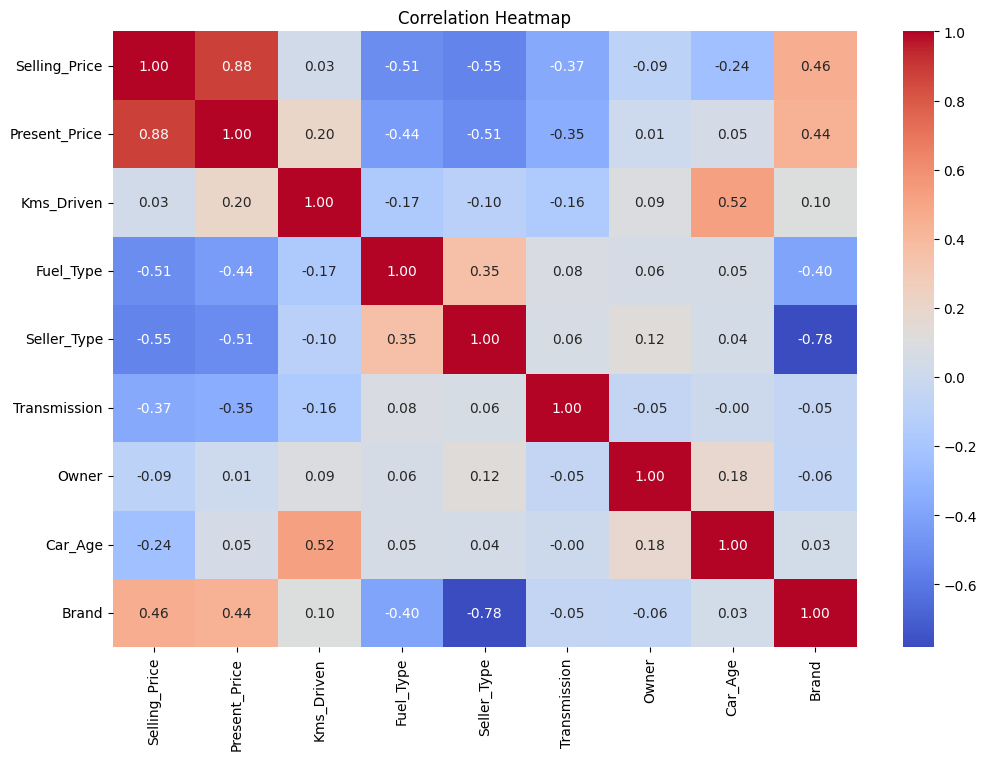

In [105]:
temp_df = car_dataset.copy()
temp_df['Fuel_Type'] = temp_df['Fuel_Type'].astype('category').cat.codes
temp_df['Seller_Type'] = temp_df['Seller_Type'].astype('category').cat.codes
temp_df['Transmission'] = temp_df['Transmission'].astype('category').cat.codes
temp_df['Brand'] = temp_df['Brand'].astype('category').cat.codes

plt.figure(figsize=(12, 8))
sns.heatmap(temp_df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Visualization 2: 
Target Variable Distribution

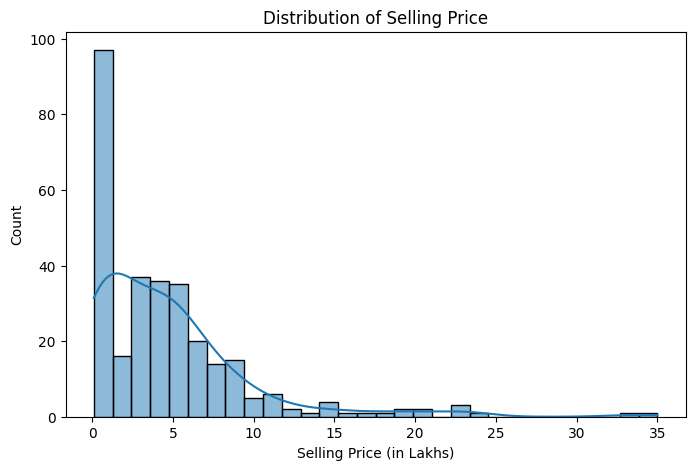

In [106]:
plt.figure(figsize=(8, 5))
sns.histplot(car_dataset['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in Lakhs)')
plt.show()

### Visualization 3: 
Car Age vs. Selling Price

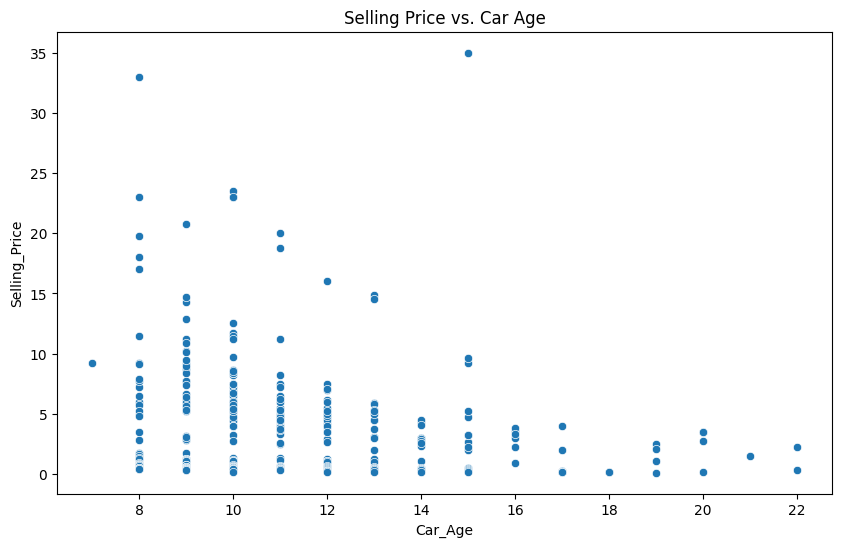

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car_Age', y='Selling_Price', data=car_dataset)
plt.title('Selling Price vs. Car Age')
plt.show()

### Visualization 4: 
Boxplot for Categorical Features

/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/_base.py:1447: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[axis] = cat_data
/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/categorical.py:415: FutureWa

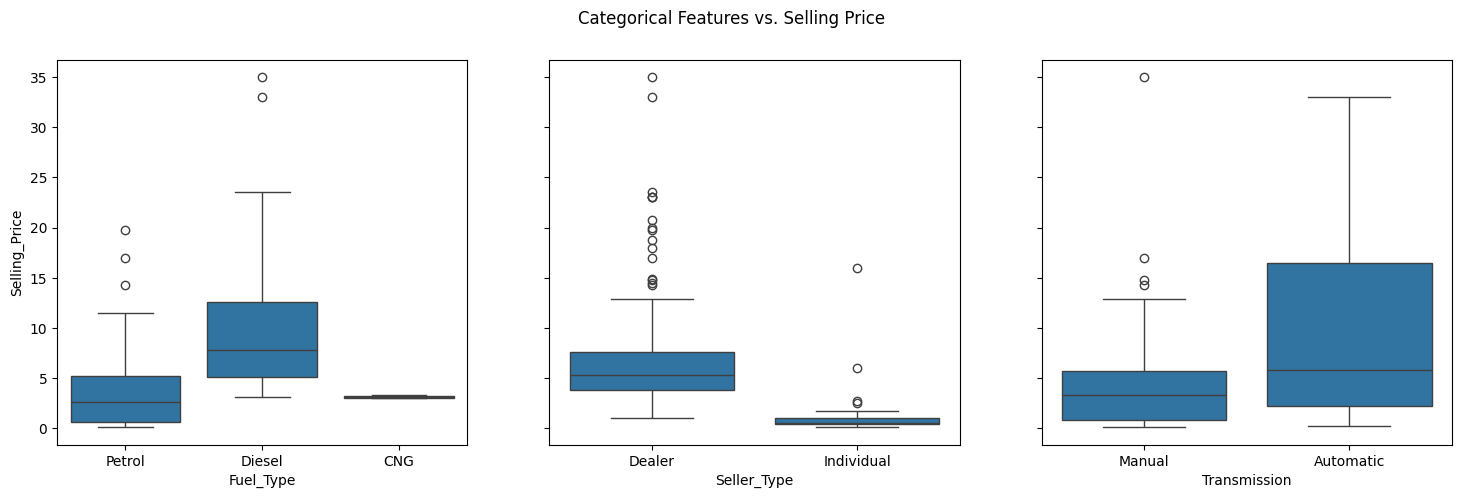

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Categorical Features vs. Selling Price')
sns.boxplot(ax=axes[0], x='Fuel_Type', y='Selling_Price', data=car_dataset)
sns.boxplot(ax=axes[1], x='Seller_Type', y='Selling_Price', data=car_dataset)
sns.boxplot(ax=axes[2], x='Transmission', y='Selling_Price', data=car_dataset)
plt.show()

Splitting data and target

In [109]:
X = car_dataset.drop('Selling_Price', axis=1)
Y = car_dataset['Selling_Price']

Splittint into training and testing data

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Building the Preprocessing Pipeline 

Define which columns are which type

In [111]:
numeric_features = ['Present_Price', 'Kms_Driven', 'Car_Age', 'Owner']
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Brand']

### Create the transformer for numeric features
### We will scale them (StandardScaler)

In [112]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

### Create the transformer for categorical features
### We will One-Hot Encode them

In [113]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

Combine these transformers using ColumnTransformer

In [114]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)], remainder='passthrough')

## Model Training & Hyperparameter Tuning ---

### We will now create a full pipeline that includes:
### 1. The 'preprocessor' we just built
### 2. The model we want to train (e.g., RandomForest)

Create the model pipeline

In [115]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', RandomForestRegressor(random_state=42))])

Define a "parameter grid" for GridSearchCV to search through

In [116]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

Set up GridSearchCV

In [117]:
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

Train the model & get the best model found by the search

In [118]:
grid_search.fit(X_train, Y_train)

best_rf_model = grid_search.best_estimator_

print("\nBest Parameters Found:")
print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits



Best Parameters Found:
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


Model Evaluation (on the BEST model)

Evaluation on training data

In [119]:
Y_train_pred = best_rf_model.predict(X_train)
train_r2 = metrics.r2_score(Y_train, Y_train_pred)
train_mae = metrics.mean_absolute_error(Y_train, Y_train_pred)
train_mse = metrics.mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f"R-squared (R2): {train_r2:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f} (lakhs)")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f} (lakhs)")

R-squared (R2): 0.9843
Mean Absolute Error (MAE): 0.2563 (lakhs)
Root Mean Squared Error (RMSE): 0.6447 (lakhs)


Evaluation on testing data

In [120]:
Y_test_pred = best_rf_model.predict(X_test)
test_r2 = metrics.r2_score(Y_test, Y_test_pred)
test_mae = metrics.mean_absolute_error(Y_test, Y_test_pred)
test_mse = metrics.mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f"R-squared (R2): {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f} (lakhs)")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f} (lakhs)")

R-squared (R2): 0.9638
Mean Absolute Error (MAE): 0.6193 (lakhs)
Root Mean Squared Error (RMSE): 0.9136 (lakhs)


Interpretation

In [121]:
print(f"Our final model explains ~{test_r2*100:.2f}% of the variance in car selling prices.")
print(f"On average, the model's predictions are off by about {test_mae:.4f} lakhs (e.g., ₹{test_mae*100000:,.0f}).")

Our final model explains ~96.38% of the variance in car selling prices.
On average, the model's predictions are off by about 0.6193 lakhs (e.g., ₹61,933).


Visualize Final Results

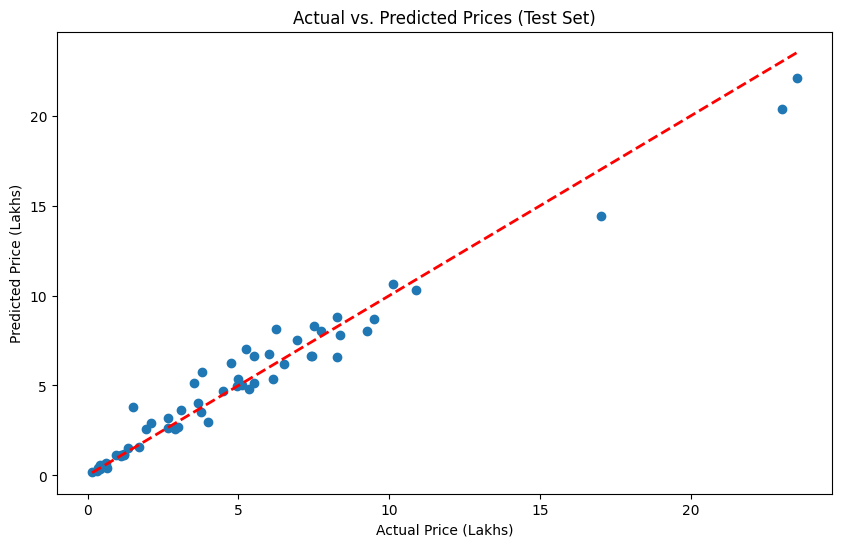

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs. Predicted Prices (Test Set)")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.show()

### To Predict
Fill this data

In [123]:
new_car_data = {
    'Present_Price': [8.5],  # Price in lakhs
    'Kms_Driven': [45000],
    'Fuel_Type': ['Petrol'],
    'Seller_Type': ['Individual'],
    'Transmission': ['Manual'],
    'Owner': [0],
    'Car_Age': [6],     # Remember to provide Car_Age, not Year!
    'Brand': ['honda']  # The brand we extracted
}

In [124]:
new_car_df = pd.DataFrame(new_car_data)
predicted_price = best_rf_model.predict(new_car_df)


print(new_car_df.to_string())
print("\n--------------------------")
print(f"Predicted Selling Price: {predicted_price[0]:.2f} lakhs")
print(f"(or approximately ₹{predicted_price[0]*100000:,.0f})")

   Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  Car_Age  Brand
0            8.5       45000    Petrol  Individual       Manual      0        6  honda

--------------------------
Predicted Selling Price: 6.87 lakhs
(or approximately ₹686,550)
